In [ ]:
!pip install contextily

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import folium
from folium.plugins import HeatMap

import contextily as ctx

# Importando os datasets

In [ ]:
df_bts = pd.read_csv('./Bts.csv')
df_test_alunos = pd.read_csv('./meds_test_alunos.csv')
df_train_alunos = pd.read_csv('./meds_train_alunos.csv')

# Pré-processamento

> Realizando pré-processamento para o dataset de `Bts`



In [ ]:
df_bts.head()

grupo    btsId btsNetNome      lat        lon  cch  azimuth    RssiId
0      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952000  873        0  rssi_1_1
1      1  BTS_1_2  PEMDL01_2 -8.04342 -34.952000  872      120  rssi_1_2
2      1  BTS_1_3  PEMDL01_3 -8.04342 -34.952000  875      240  rssi_1_3
3      2  BTS_2_1  PEMDL08_1 -8.05289 -34.944672  865        0  rssi_2_1
4      2  BTS_2_2  PEMDL08_2 -8.05289 -34.944672  874      120  rssi_2_2

In [ ]:
df_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grupo       9 non-null      int64  
 1   btsId       9 non-null      object 
 2   btsNetNome  9 non-null      object 
 3   lat         9 non-null      float64
 4   lon         9 non-null      float64
 5   cch         9 non-null      int64  
 6   azimuth     9 non-null      int64  
 7   RssiId      9 non-null      object 
dtypes: float64(2), int64(3), object(3)
memory usage: 708.0+ bytes


In [ ]:
df_bts.isnull().sum()

grupo         0
btsId         0
btsNetNome    0
lat           0
lon           0
cch           0
azimuth       0
RssiId        0
dtype: int64

In [ ]:
df_bts[df_bts.duplicated()].any()

grupo         False
btsId         False
btsNetNome    False
lat           False
lon           False
cch           False
azimuth       False
RssiId        False
dtype: bool

> Realizando pré-processamento para o dataset de `Test_alunos`



In [ ]:
df_test_alunos.head()

ponto_id  rssi_1_1  rssi_1_2  rssi_1_3  rssi_2_1  rssi_2_2  rssi_2_3  \
0         0    -115.0    -115.0    -115.0    -115.0    -115.0    -115.0   
1         3    -115.0    -115.0    -115.0    -115.0    -115.0    -115.0   
2         8    -115.0    -115.0    -115.0    -115.0    -115.0    -115.0   
3        10    -115.0    -115.0    -115.0    -115.0    -115.0    -115.0   
4        12    -115.0    -115.0    -115.0    -115.0    -115.0    -115.0   

   rssi_3_1   rssi_3_2  rssi_3_3  delay_1  delay_2  delay_3  
0    -90.93 -84.113333    -115.0      5.0      3.0      2.0  
1    -90.93 -84.113333    -115.0      5.0      3.0      2.0  
2    -90.93 -86.090000    -115.0      5.0      3.0      2.0  
3    -90.93 -84.113333    -115.0      5.0      3.0      2.0  
4    -90.93 -84.113333    -115.0      5.0      3.0      2.0

In [ ]:
df_test_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ponto_id  2904 non-null   int64  
 1   rssi_1_1  2904 non-null   float64
 2   rssi_1_2  2904 non-null   float64
 3   rssi_1_3  2904 non-null   float64
 4   rssi_2_1  2904 non-null   float64
 5   rssi_2_2  2904 non-null   float64
 6   rssi_2_3  2904 non-null   float64
 7   rssi_3_1  2904 non-null   float64
 8   rssi_3_2  2904 non-null   float64
 9   rssi_3_3  2904 non-null   float64
 10  delay_1   2904 non-null   float64
 11  delay_2   2904 non-null   float64
 12  delay_3   2904 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 295.1 KB


In [ ]:
df_test_alunos.isnull().sum()

ponto_id    0
rssi_1_1    0
rssi_1_2    0
rssi_1_3    0
rssi_2_1    0
rssi_2_2    0
rssi_2_3    0
rssi_3_1    0
rssi_3_2    0
rssi_3_3    0
delay_1     0
delay_2     0
delay_3     0
dtype: int64

In [ ]:
df_test_alunos[df_test_alunos.duplicated()].any()

ponto_id    False
rssi_1_1    False
rssi_1_2    False
rssi_1_3    False
rssi_2_1    False
rssi_2_2    False
rssi_2_3    False
rssi_3_1    False
rssi_3_2    False
rssi_3_3    False
delay_1     False
delay_2     False
delay_3     False
dtype: bool

> Realizando pré-processamento para o dataset de `Train_alunos`



In [ ]:
df_train_alunos.head()

ponto_id    rssi_1_1    rssi_1_2    rssi_1_3    rssi_2_1    rssi_2_2  \
0      6604 -103.705000 -110.425000 -107.381667 -110.330000 -108.345000   
1      5515 -105.225000 -115.000000 -105.210000 -115.000000 -105.835000   
2      5049 -102.610000 -115.000000 -101.380000 -115.000000 -104.295000   
3      8737  -89.140000  -97.251429  -86.642857  -96.036667  -96.592500   
4      1203 -109.088333 -107.200000 -107.010000 -108.430000 -104.845714   

     rssi_2_3    rssi_3_1    rssi_3_2  rssi_3_3  delay_1  delay_2  delay_3  \
0 -106.590000 -107.153333 -102.120000   -115.00      5.0      3.0      2.0   
1 -115.000000  -88.470000  -94.024286   -108.12      5.0      3.0      2.0   
2  -97.360000  -96.980000  -99.572500   -115.00      5.0      3.0      2.0   
3  -92.460000  -86.813333 -102.688000    -87.27      4.0      7.0      2.0   
4 -101.435714 -103.065000 -102.110000   -115.00      5.0      3.0      2.0   

        lat        lon  indoor  
0 -8.055786 -34.951505    True  
1 -8.055784 -34.951608    True  
2 -8.055506 -34.951693    True  
3 -8.050390 -34.959630   False  
4 -8.055380 -34.951736    True

In [ ]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ponto_id  6775 non-null   int64  
 1   rssi_1_1  6775 non-null   float64
 2   rssi_1_2  6775 non-null   float64
 3   rssi_1_3  6775 non-null   float64
 4   rssi_2_1  6775 non-null   float64
 5   rssi_2_2  6775 non-null   float64
 6   rssi_2_3  6775 non-null   float64
 7   rssi_3_1  6775 non-null   float64
 8   rssi_3_2  6775 non-null   float64
 9   rssi_3_3  6775 non-null   float64
 10  delay_1   6775 non-null   float64
 11  delay_2   6775 non-null   float64
 12  delay_3   6775 non-null   float64
 13  lat       6775 non-null   float64
 14  lon       6775 non-null   float64
 15  indoor    6775 non-null   bool   
dtypes: bool(1), float64(14), int64(1)
memory usage: 800.7 KB


In [ ]:
df_train_alunos.isnull().sum()

ponto_id    0
rssi_1_1    0
rssi_1_2    0
rssi_1_3    0
rssi_2_1    0
rssi_2_2    0
rssi_2_3    0
rssi_3_1    0
rssi_3_2    0
rssi_3_3    0
delay_1     0
delay_2     0
delay_3     0
lat         0
lon         0
indoor      0
dtype: int64

In [ ]:
df_test_alunos[df_test_alunos.duplicated()].any()

ponto_id    False
rssi_1_1    False
rssi_1_2    False
rssi_1_3    False
rssi_2_1    False
rssi_2_2    False
rssi_2_3    False
rssi_3_1    False
rssi_3_2    False
rssi_3_3    False
delay_1     False
delay_2     False
delay_3     False
dtype: bool

# Análise, distribuição e visualização dos dados



In [ ]:
df_train_alunos.describe()

ponto_id     rssi_1_1     rssi_1_2     rssi_1_3     rssi_2_1  \
count  6775.000000  6775.000000  6775.000000  6775.000000  6775.000000   
mean   4856.099779  -100.789923  -105.688802  -100.545198  -103.524786   
std    2785.645694    10.025728    10.397924     9.968138    13.367328   
min       1.000000  -115.000000  -115.000000  -115.000000  -115.000000   
25%    2434.500000  -107.650000  -115.000000  -107.148571  -115.000000   
50%    4875.000000  -103.040000  -110.425000   -99.750000  -108.430000   
75%    7272.500000   -93.455000   -97.350000   -93.340000   -96.817917   
max    9676.000000   -61.380000   -64.820000   -60.640000   -36.960000   

          rssi_2_2     rssi_2_3     rssi_3_1     rssi_3_2     rssi_3_3  \
count  6775.000000  6775.000000  6775.000000  6775.000000  6775.000000   
mean    -97.210290   -97.193499   -93.644749   -93.353728  -107.478361   
std       8.853480     9.992950     7.688089     8.110877    11.003407   
min    -115.000000  -115.000000  -113.140000  -115.630000  -115.000000   
25%    -102.202857  -101.652857   -99.480000   -99.005000  -115.000000   
50%     -97.170000   -95.615714   -94.785000   -95.688000  -115.000000   
75%     -92.080000   -91.951429   -89.375000   -89.610500   -97.600000   
max     -59.170000   -56.980000   -56.060000   -55.870000   -52.540000   

           delay_1      delay_2      delay_3          lat          lon  
count  6775.000000  6775.000000  6775.000000  6775.000000  6775.000000  
mean      4.679410     3.159262     2.504945    -8.054510   -34.951792  
std       0.911469     1.009927     1.095094     0.002388     0.002310  
min       1.000000     0.000000     0.000000    -8.059550   -34.959850  
25%       5.000000     3.000000     2.000000    -8.055784   -34.951728  
50%       5.000000     3.000000     2.000000    -8.055494   -34.951597  
75%       5.000000     3.000000     3.000000    -8.055310   -34.951331  
max       8.000000     7.000000     7.000000    -8.046420   -34.945110

In [ ]:
df_test_alunos.describe()

ponto_id     rssi_1_1     rssi_1_2     rssi_1_3     rssi_2_1  \
count  2904.000000  2904.000000  2904.000000  2904.000000  2904.000000   
mean   4799.106405  -100.991875  -105.885008  -100.685644  -103.411642   
std    2814.236124     9.933416    10.417400     9.978536    13.990015   
min       0.000000  -115.000000  -115.000000  -115.000000  -115.000000   
25%    2361.000000  -107.650000  -115.000000  -107.148571  -115.000000   
50%    4765.500000  -103.040000  -110.425000   -99.750000  -108.430000   
75%    7210.250000   -93.675357   -97.350000   -93.592857   -96.550000   
max    9678.000000   -65.330000   -66.320000   -65.140000   -41.150000   

          rssi_2_2     rssi_2_3     rssi_3_1     rssi_3_2     rssi_3_3  \
count  2904.000000  2904.000000  2904.000000  2904.000000  2904.000000   
mean    -97.397221   -97.361075   -93.790210   -93.232673  -107.604530   
std       9.208718    10.256866     7.553796     8.225281    10.960141   
min    -115.000000  -115.000000  -113.300000  -114.420000  -115.000000   
25%    -103.315000  -102.440000   -99.380000   -98.787500  -115.000000   
50%     -97.200000   -95.615714   -95.140000   -95.518000  -115.000000   
75%     -91.935000   -92.347679   -89.777917   -89.132857   -97.600000   
max     -55.550000   -58.860000   -52.690000   -56.620000   -50.100000   

           delay_1      delay_2      delay_3  
count  2904.000000  2904.000000  2904.000000  
mean      4.676653     3.121901     2.535124  
std       0.928623     1.002726     1.134803  
min       1.000000     0.000000     0.000000  
25%       5.000000     3.000000     2.000000  
50%       5.000000     3.000000     2.000000  
75%       5.000000     3.000000     3.000000  
max       7.000000     7.000000     7.000000

## Alisando pontos **indoors** e **outdoors**

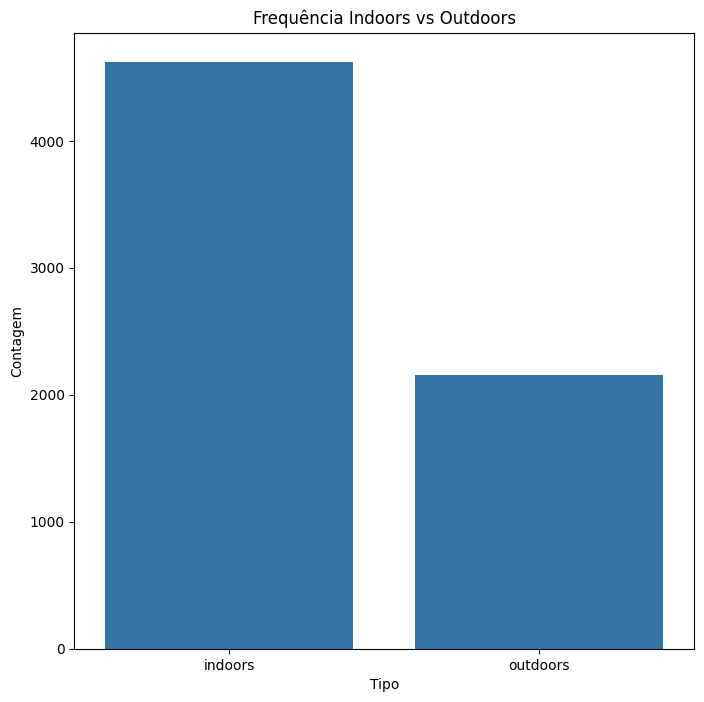

In [76]:
df_train_indoors = df_train_alunos[df_train_alunos['indoor'] == True]
df_train_outdoors = df_train_alunos[df_train_alunos['indoor'] == False]


plt.figure(figsize=(8, 8))
sns.barplot(x=['indoors', 'outdoors'], y=[len(df_train_indoors), len(df_train_outdoors)])
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Frequência Indoors vs Outdoors')
plt.show()

# Mapeando pontos e antenas

> Analisando os pontos `indoors` em relação as BTS


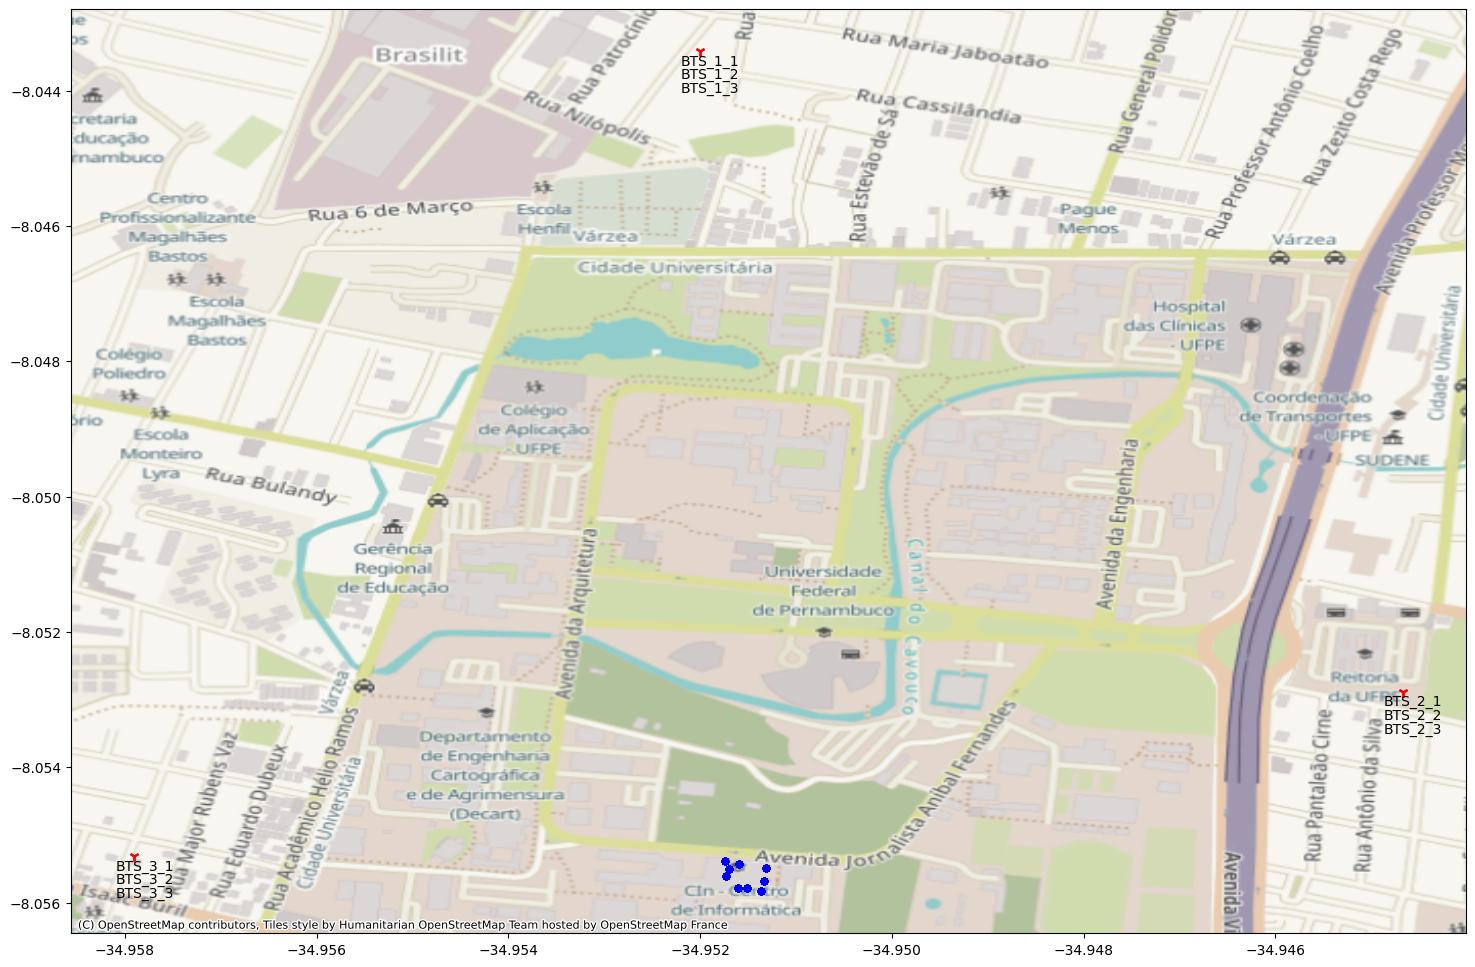

In [77]:
fig, subs = plt.subplots()

subs.scatter(df_train_indoors['lon'], df_train_indoors['lat'], color='blue', s = 20)
subs.scatter(df_bts['lon'], df_bts['lat'], color = 'red', s = 50, alpha = 1, marker = '1')

aux_bts_dict = {}
for i, row in df_bts.iterrows():
    coordinates = (row['lon'], row['lat'])
    if coordinates not in aux_bts_dict:
        aux_bts_dict[coordinates] = 1
    else:
        aux_bts_dict[coordinates] += 1
    subs.annotate(row['btsId'], coordinates, xytext=(coordinates[0]-0.0002, coordinates[1]-0.0002 * aux_bts_dict[coordinates]))

plt.gcf().set_size_inches((18,12))
ctx.add_basemap(plt.gca(), crs='EPSG:4326')
plt.show()

> Analisando os pontos `outdoors` em relação as BTS

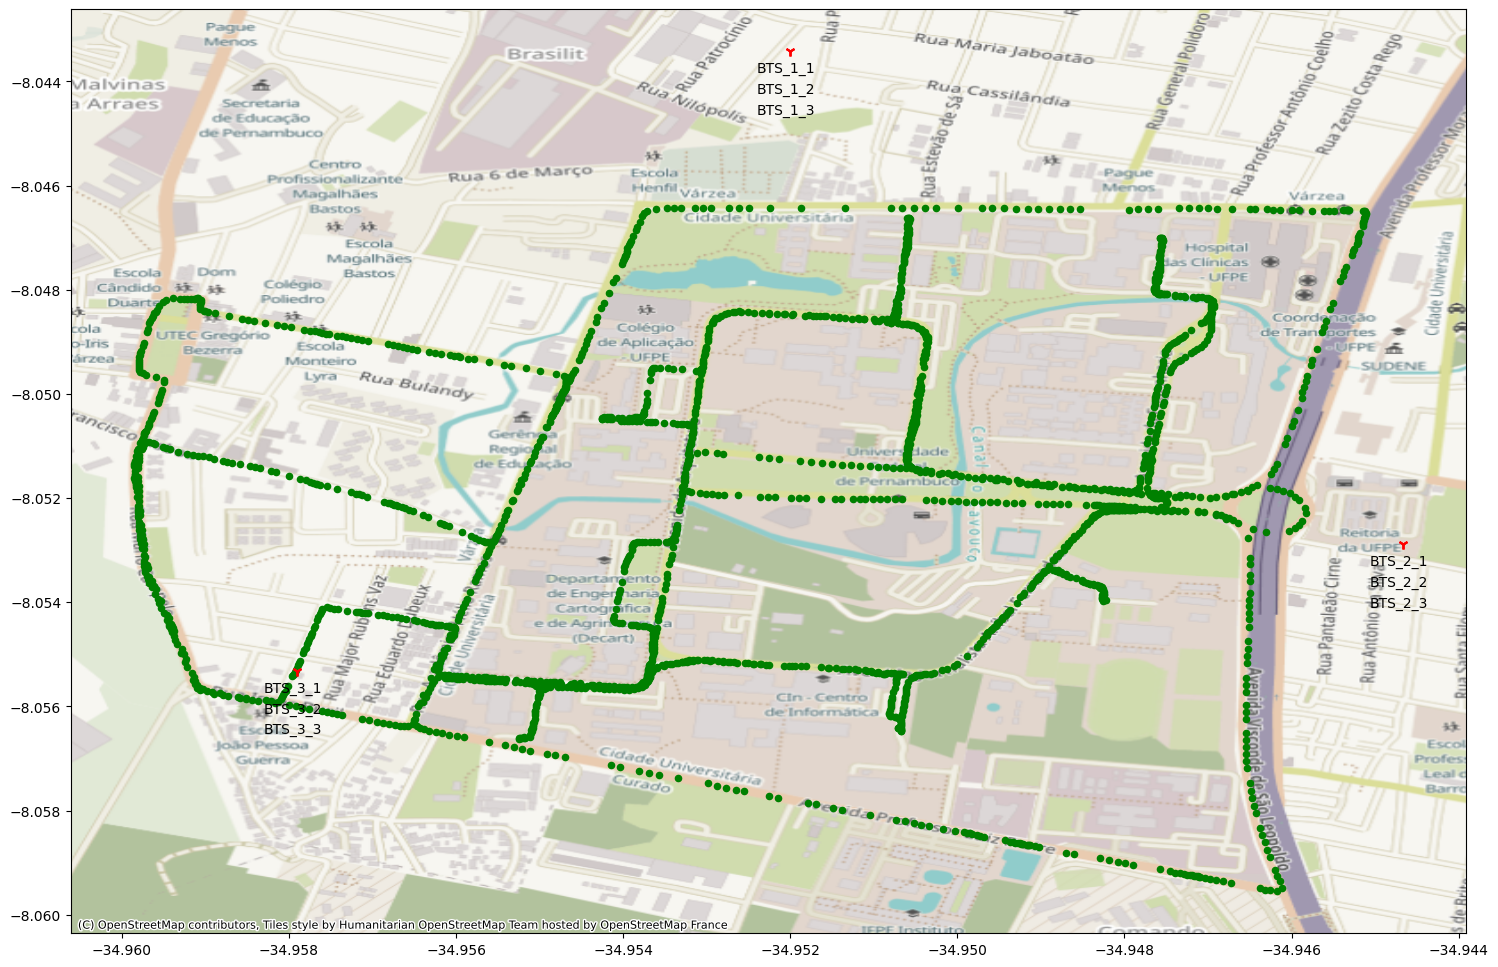

In [ ]:
fig, subs = plt.subplots()

subs.scatter(df_train_outdoors['lon'], df_train_outdoors['lat'], color='green', s = 20)
subs.scatter(df_bts['lon'], df_bts['lat'], color = 'red', s = 50, alpha = 1, marker = '1')

aux_bts_dict = {}
for i, row in df_bts.iterrows():
    coordinates = (row['lon'], row['lat'])
    if coordinates not in aux_bts_dict:
        aux_bts_dict[coordinates] = 1
    else:
        aux_bts_dict[coordinates] += 1
    subs.annotate(row['btsId'], coordinates, xytext=(coordinates[0]-0.0004, coordinates[1]-0.0004 * aux_bts_dict[coordinates]))

plt.gcf().set_size_inches((18,12))
ctx.add_basemap(plt.gca(), crs='EPSG:4326')
plt.show()

# Distribuição dos RSSI

> Iremos avaliar para caso acharmos muitos valores outliers

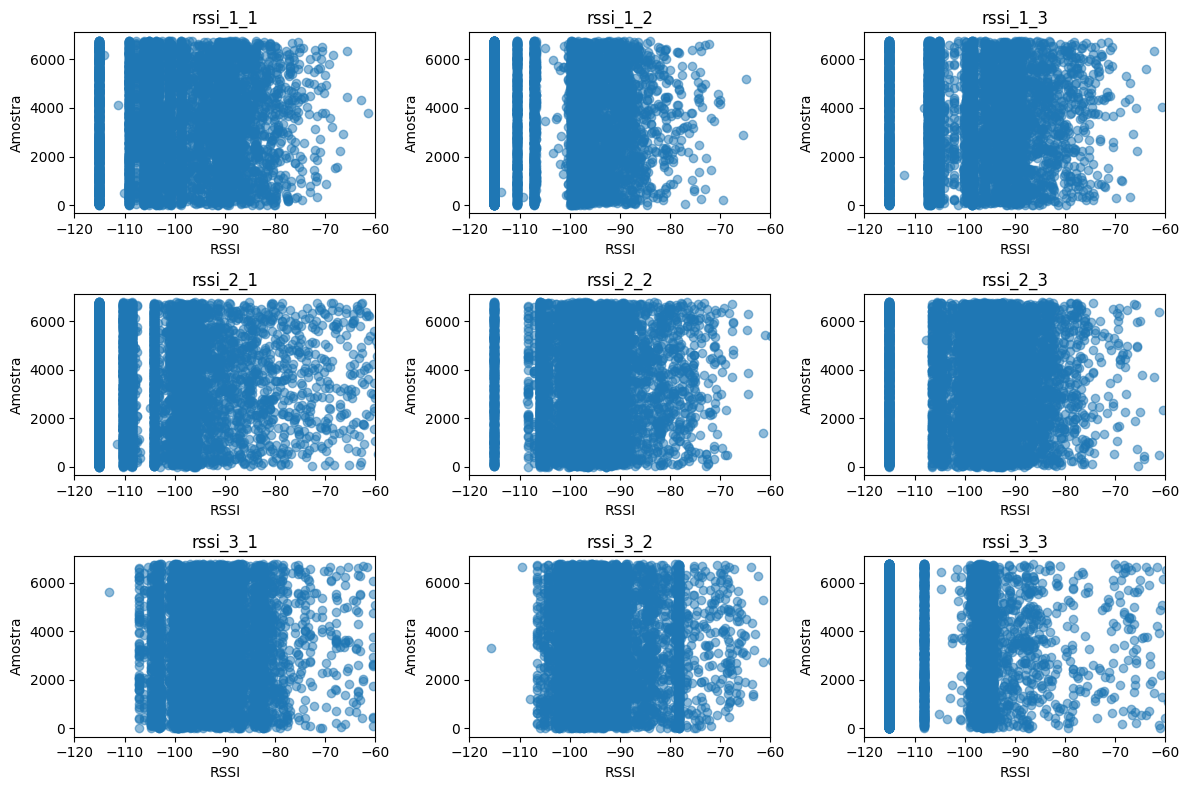

In [126]:
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

plt.figure(figsize=(12, 8))
for col in columns:
    plt.subplot(3, 3, columns.index(col) + 1)
    plt.scatter(df_train_alunos[col], range(len(df_train_alunos)), alpha=0.5)
    plt.title(col)
    plt.xlabel('RSSI')
    plt.ylabel('Amostra')
    plt.xlim(-120, -60)

plt.tight_layout()
plt.show()

# RSSI Médio para cada um dos Grupos de BTS
> Iremos analisar para cada ponto a média de RSSI em relação ao grupo 1 das amostras: `rssi_1_1`, `rssi_1_2`, `rssi_1_3`

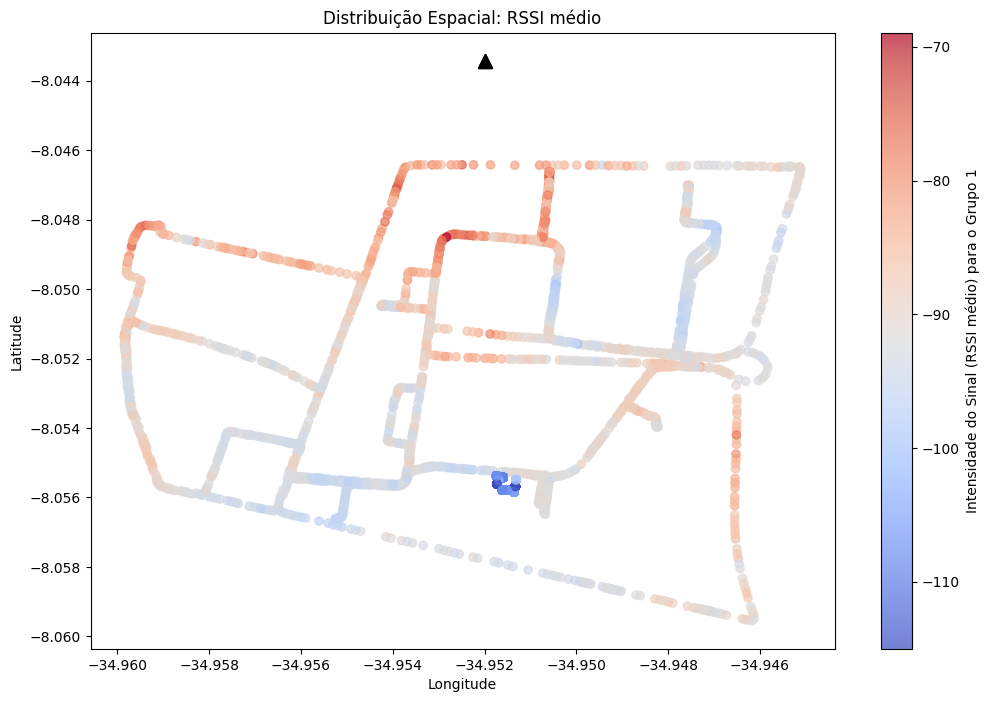

In [81]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_1_1', 'rssi_1_2', 'rssi_1_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_1_1", "BTS_1_2", "BTS_1_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_1_1, BTS_1_2, BTS_1_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 1')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI médio')

plt.show()

 > Do ponto de visto de RSSI, conseguimos perceber que o os ponto que estão mais pertos da BTS possuem sinais mais forte, enquanto vamos nos afastando esse força do sinal cai. Possuindo até um caso notável que os pontos que estão em um ambiente `indoor`. Com isso, vamos também comparar com o `delay_1` para tentar achar alguma correlação

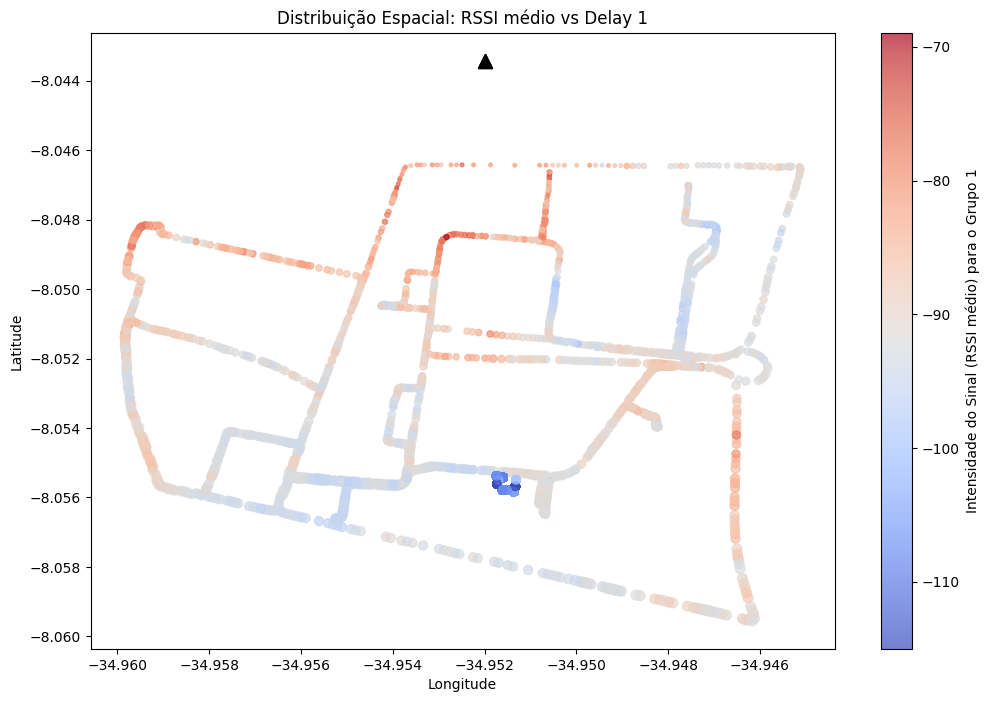

In [97]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_1_1', 'rssi_1_2', 'rssi_1_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      s=df_train_alunos['delay_1'] * 7,
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_1_1", "BTS_1_2", "BTS_1_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_1_1, BTS_1_2, BTS_1_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 1')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI médio vs Delay 1')

plt.show()

> Conseguimos perceber que os pontos que sumiram são os pontos onde o delay é tão próximo de zero que apenas deixou de aparecer na nossa visualização. Como também, podemos confirmar que o delay vai aumentando enquanto nos afastamos do grupo da **BTS 1**.

> Iremos analisar para cada ponto a média de RSSI em relação ao grupo 1 das amostras: `rssi_2_1`, `rssi_2_2`, `rssi_2_3`

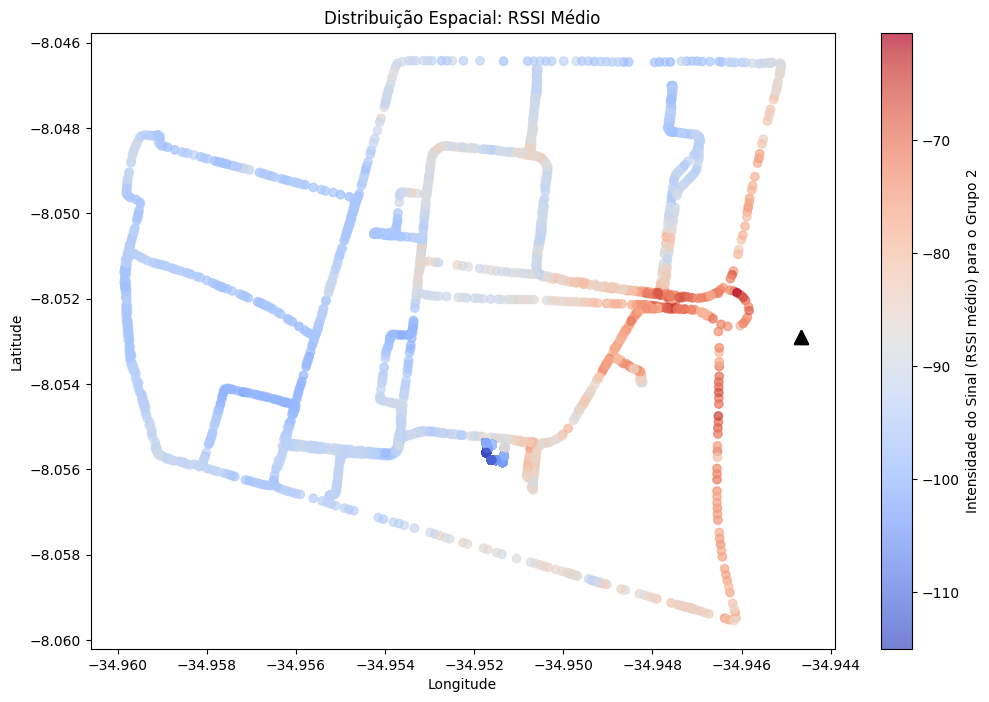

In [93]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_2_1', 'rssi_2_2', 'rssi_2_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_2_1", "BTS_2_2", "BTS_2_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_2_1, BTS_2_2, BTS_2_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 2')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI Médio')

plt.show()


> Procurando correlação com `delay_2`

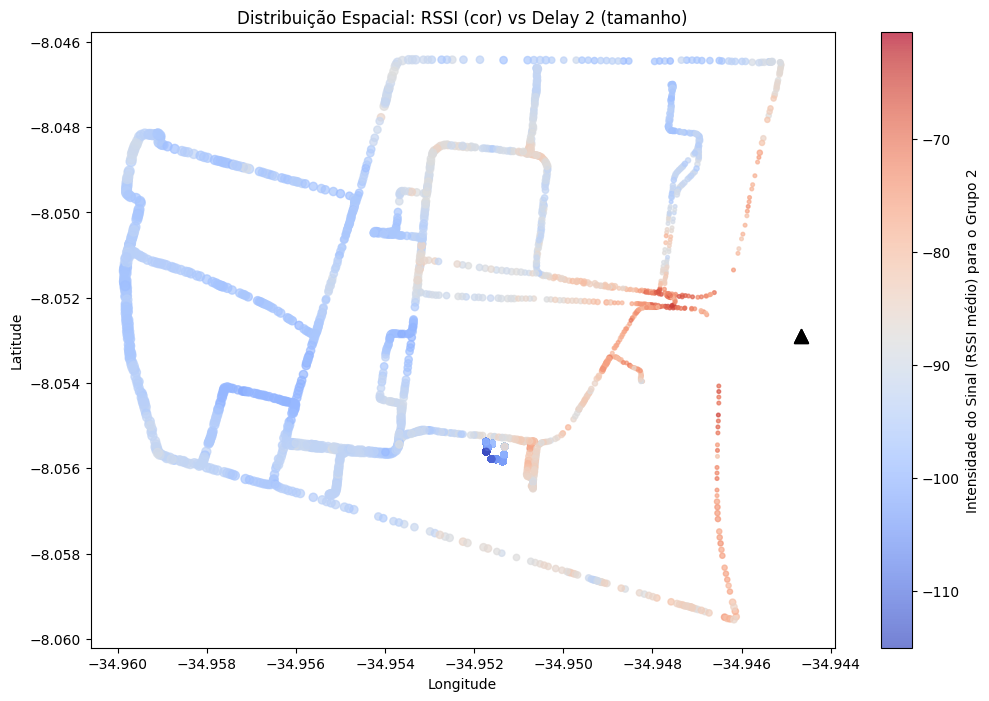

In [94]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_2_1', 'rssi_2_2', 'rssi_2_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      s=df_train_alunos['delay_2'] * 7,
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_2_1", "BTS_2_2", "BTS_2_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_2_1, BTS_2_2, BTS_2_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 2')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI (cor) vs Delay 2 (tamanho)')

plt.show()


> Como podemos ver, obtemos a mesma relação quando analisamos no grupo de BTS 1.

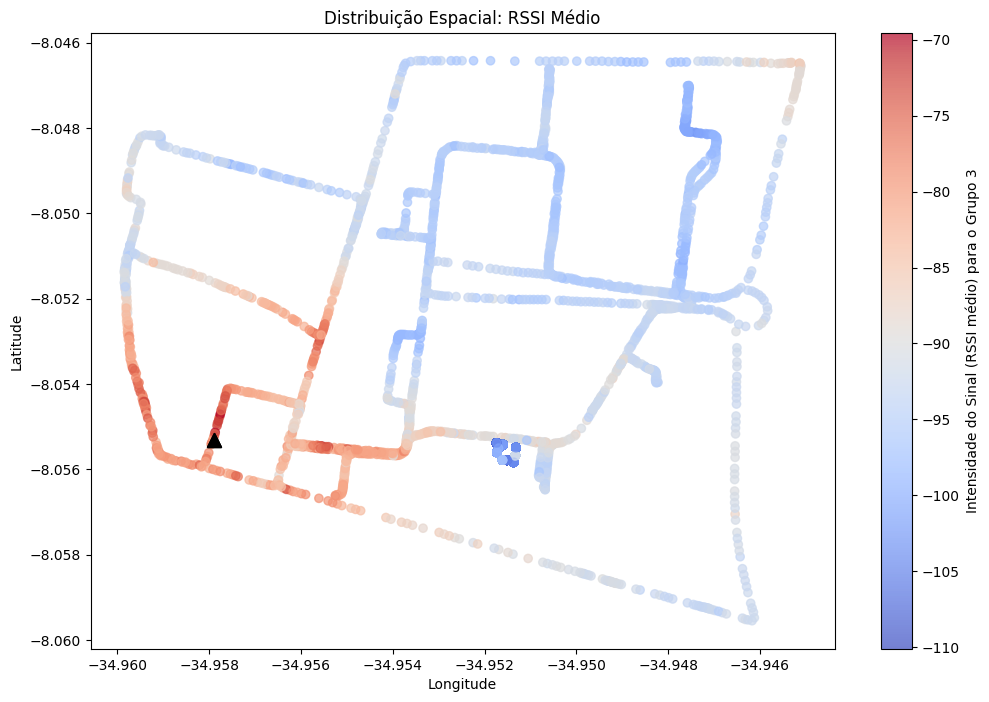

In [95]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_3_1', 'rssi_3_2', 'rssi_3_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_3_1", "BTS_3_2", "BTS_3_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_3_1, BTS_3_2, BTS_3_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 3')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI Médio')

plt.show()


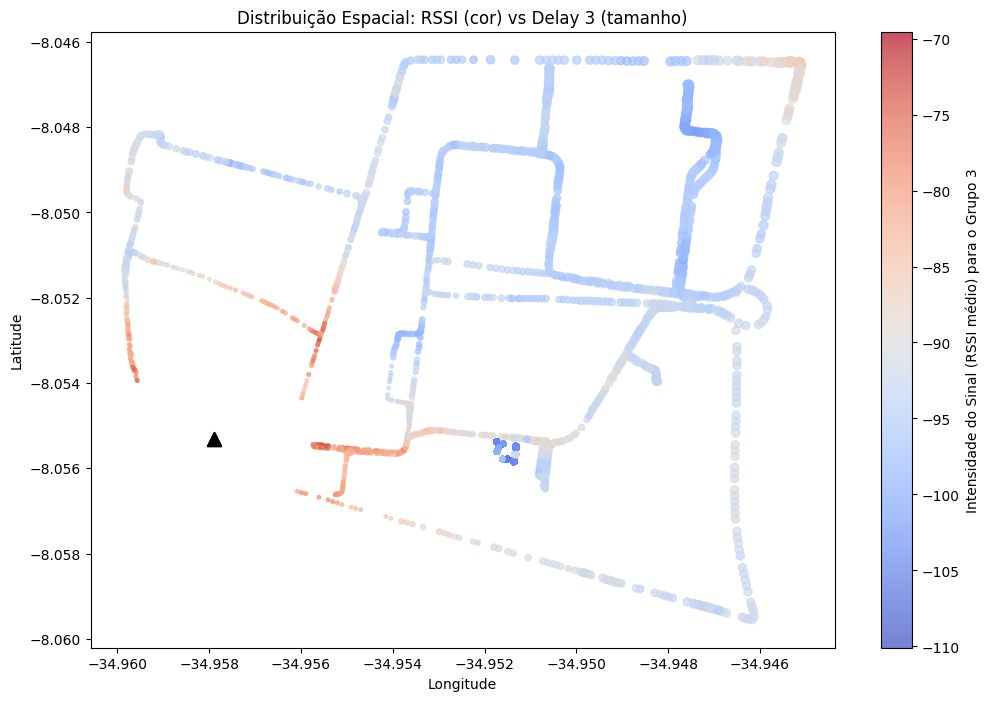

In [96]:
plt.figure(figsize=(12, 8))

df_train_alunos['rssi_medio'] = df_train_alunos[['rssi_3_1', 'rssi_3_2', 'rssi_3_3']].mean(axis=1)

# - A cor representa a intensidade do sinal (RSSI médio)
scatter = plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'],
                      s=df_train_alunos['delay_3'] * 7,
                      c=df_train_alunos['rssi_medio'], cmap='coolwarm', alpha=0.7)

bts_ids_filtradas = ["BTS_3_1", "BTS_3_2", "BTS_3_3"]
df_bts_filtradas = df_bts[df_bts['btsId'].isin(bts_ids_filtradas)]
plt.scatter(df_bts_filtradas['lon'], df_bts_filtradas['lat'],
            marker='^', color='black', s=100, label='BTSs (BTS_3_1, BTS_3_2, BTS_3_3)')

cbar = plt.colorbar(scatter)
cbar.set_label('Intensidade do Sinal (RSSI médio) para o Grupo 3')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial: RSSI (cor) vs Delay 3 (tamanho)')

plt.show()


## Avaliando os grupos de delays

In [99]:
max_delays_indoor = df_train_alunos[df_train_alunos['indoor'] == 1][['delay_1', 'delay_2', 'delay_3']].max()
max_delays_outdoor = df_train_alunos[df_train_alunos['indoor'] == 0][['delay_1', 'delay_2', 'delay_3']].max()

df_max_comparison = pd.DataFrame({'Indoor': max_delays_indoor, 'Outdoor': max_delays_outdoor})
df_max_comparison

Indoor  Outdoor
delay_1     5.0      8.0
delay_2     3.0      7.0
delay_3     3.0      7.0

Analisando a distribuição dos valores para as colunas de `delay_1`, `delay_2`,`delay_3`

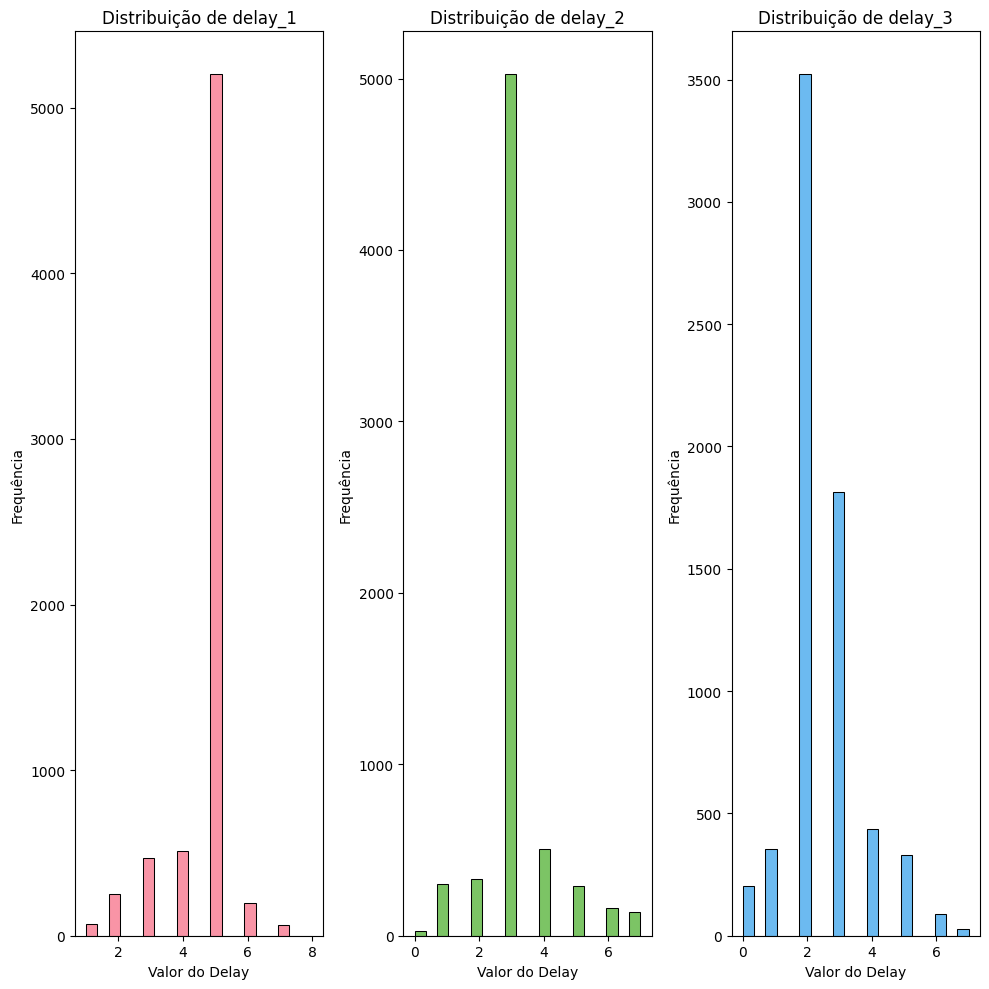

In [ ]:
columns = ['delay_1', 'delay_2', 'delay_3']

colors = sns.color_palette('husl', len(columns))

fig, axes = plt.subplots(ncols=3, figsize=(10,10))
for col, ax, color in zip(columns, axes.ravel(), colors):
    sns.histplot(data=df_train_alunos[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('Valor do Delay')
    ax.set_ylabel('Frequência')
    ax.set_title(f'Distribuição de {col}')


plt.tight_layout()
plt.show()

> Aqui podemos analisar aonde o delay realmente é mais forte, com isso podemos ver que tem uma região específica que sofre com altos índices de atraso

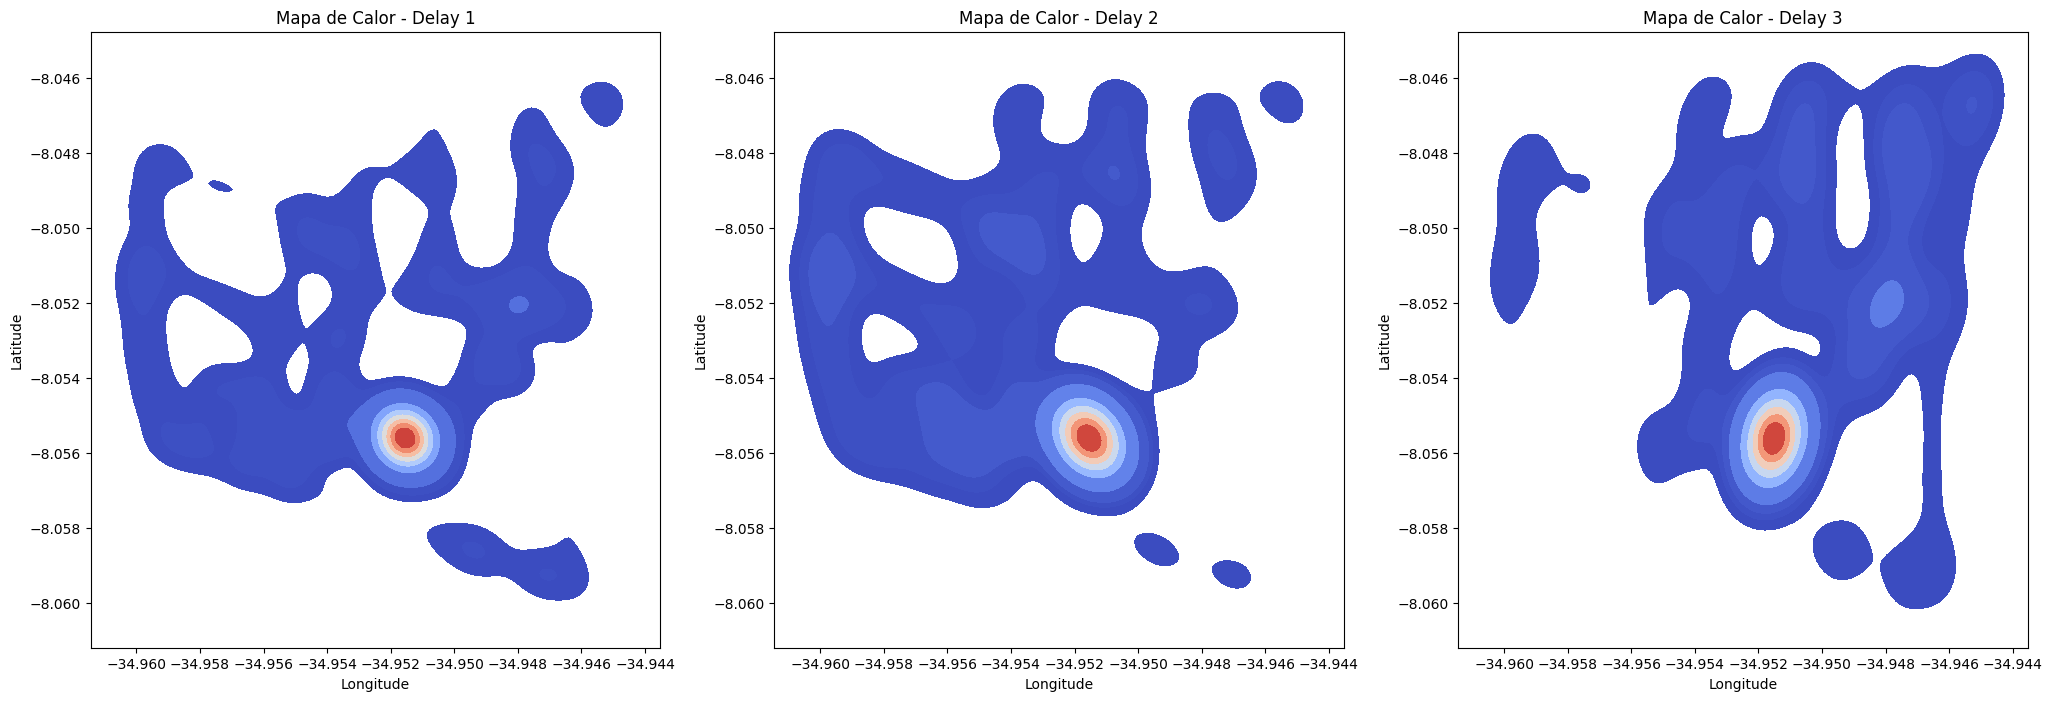

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

delays = ['delay_1', 'delay_2', 'delay_3']
titles = ['Mapa de Calor - Delay 1', 'Mapa de Calor - Delay 2', 'Mapa de Calor - Delay 3']

for i, delay in enumerate(delays):
    sns.kdeplot(x=df_train_alunos['lon'], y=df_train_alunos['lat'],
                weights=df_train_alunos[delay], cmap="coolwarm", fill=True, ax=axes[i])
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].set_title(titles[i])

plt.show()

> Na imagem acima podemos observar uma correlação entre as posições afetas com altos valores de atraso dentre delay de cada um dos grupos presentes nas amostras

In [112]:
top_delays = df_train_alunos.nlargest(50, 'delay_1')[['lat', 'lon', 'delay_1']]
print(top_delays)

          lat       lon  delay_1
6555 -8.05955 -34.94617      8.0
128  -8.05929 -34.94704      7.0
272  -8.05923 -34.94722      7.0
367  -8.05844 -34.94988      7.0
494  -8.05949 -34.94638      7.0
528  -8.05833 -34.94638      7.0
538  -8.05845 -34.94983      7.0
652  -8.05867 -34.94914      7.0
859  -8.05844 -34.94985      7.0
907  -8.05862 -34.94928      7.0
1007 -8.05931 -34.94698      7.0
1068 -8.05914 -34.94620      7.0
1574 -8.05862 -34.94931      7.0
1663 -8.05883 -34.94861      7.0
1680 -8.05948 -34.94612      7.0
1816 -8.05861 -34.94933      7.0
2237 -8.05857 -34.94943      7.0
2254 -8.05805 -34.94643      7.0
2357 -8.05935 -34.94614      7.0
2358 -8.05847 -34.94977      7.0
2488 -8.05848 -34.94973      7.0
2489 -8.05867 -34.94913      7.0
2754 -8.05925 -34.94714      7.0
2868 -8.05864 -34.94923      7.0
2907 -8.05913 -34.94758      7.0
2911 -8.05835 -34.95017      7.0
3052 -8.05892 -34.94829      7.0
3129 -8.05867 -34.94915      7.0
3250 -8.05936 -34.94682      7.0
3265 -8.05

In [111]:
import folium
from folium.plugins import HeatMap

map_center = [df_train_alunos['lat'].mean(), df_train_alunos['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

heat_data = [[row['lat'], row['lon'], row['delay_1']] for _, row in df_train_alunos.iterrows()]
HeatMap(heat_data, radius=10).add_to(mymap)

for _, row in top_delays.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Delay 1: {row['delay_1']:.2f}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(mymap)

mymap


In [119]:
top_delays_2 = df_train_alunos.nlargest(50, 'delay_2')[['lat', 'lon', 'delay_2']]
print(top_delays_2)

          lat       lon  delay_2
3    -8.05039 -34.95963      7.0
109  -8.05078 -34.95973      7.0
145  -8.05120 -34.95983      7.0
193  -8.04827 -34.95906      7.0
223  -8.04832 -34.95955      7.0
241  -8.05034 -34.95961      7.0
266  -8.05073 -34.95972      7.0
315  -8.05049 -34.95965      7.0
355  -8.05129 -34.95980      7.0
380  -8.05012 -34.95956      7.0
501  -8.05168 -34.95981      7.0
518  -8.05178 -34.95983      7.0
541  -8.05342 -34.95972      7.0
550  -8.05153 -34.95984      7.0
656  -8.04818 -34.95914      7.0
721  -8.05287 -34.95977      7.0
746  -8.04850 -34.95963      7.0
782  -8.05177 -34.95980      7.0
793  -8.05279 -34.95975      7.0
807  -8.05233 -34.95978      7.0
850  -8.05229 -34.95981      7.0
918  -8.04954 -34.95980      7.0
959  -8.05136 -34.95981      7.0
960  -8.04993 -34.95952      7.0
973  -8.05175 -34.95983      7.0
1027 -8.04907 -34.95975      7.0
1108 -8.04844 -34.95961      7.0
1123 -8.05224 -34.95978      7.0
1229 -8.05123 -34.95980      7.0
1239 -8.05

In [120]:
import folium
from folium.plugins import HeatMap

map_center = [df_train_alunos['lat'].mean(), df_train_alunos['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

heat_data = [[row['lat'], row['lon'], row['delay_2']] for _, row in df_train_alunos.iterrows()]
HeatMap(heat_data, radius=10).add_to(mymap)

for _, row in top_delays_2.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Delay 2: {row['delay_2']:.2f}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(mymap)

mymap


In [121]:
top_delays_3 = df_train_alunos.nlargest(50, 'delay_3')[['lat', 'lon', 'delay_3']]
print(top_delays_2)

          lat       lon  delay_2
3    -8.05039 -34.95963      7.0
109  -8.05078 -34.95973      7.0
145  -8.05120 -34.95983      7.0
193  -8.04827 -34.95906      7.0
223  -8.04832 -34.95955      7.0
241  -8.05034 -34.95961      7.0
266  -8.05073 -34.95972      7.0
315  -8.05049 -34.95965      7.0
355  -8.05129 -34.95980      7.0
380  -8.05012 -34.95956      7.0
501  -8.05168 -34.95981      7.0
518  -8.05178 -34.95983      7.0
541  -8.05342 -34.95972      7.0
550  -8.05153 -34.95984      7.0
656  -8.04818 -34.95914      7.0
721  -8.05287 -34.95977      7.0
746  -8.04850 -34.95963      7.0
782  -8.05177 -34.95980      7.0
793  -8.05279 -34.95975      7.0
807  -8.05233 -34.95978      7.0
850  -8.05229 -34.95981      7.0
918  -8.04954 -34.95980      7.0
959  -8.05136 -34.95981      7.0
960  -8.04993 -34.95952      7.0
973  -8.05175 -34.95983      7.0
1027 -8.04907 -34.95975      7.0
1108 -8.04844 -34.95961      7.0
1123 -8.05224 -34.95978      7.0
1229 -8.05123 -34.95980      7.0
1239 -8.05

In [123]:
import folium
from folium.plugins import HeatMap

map_center = [df_train_alunos['lat'].mean(), df_train_alunos['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

heat_data = [[row['lat'], row['lon'], row['delay_3']] for _, row in df_train_alunos.iterrows()]
HeatMap(heat_data, radius=10).add_to(mymap)

for _, row in top_delays_3.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Delay 2: {row['delay_3']:.2f}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(mymap)

mymap
